In [1]:

from dotenv import load_dotenv
load_dotenv()
import scllm as sl
import scanpy as sc
import pandas as pd
from langchain_openai import ChatOpenAI

# Annotate cell types

In this tutorial we will use Chat GPT to annotate cell types.

In [17]:
pbmc = sc.datasets.pbmc3k_processed()

In [18]:
openai_model = "gpt-4o-mini"
llm = ChatOpenAI(temperature=0.0, model=openai_model)

In [19]:
pbmc

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [20]:
sc.tl.leiden(pbmc, flavor="igraph", n_iterations=2)

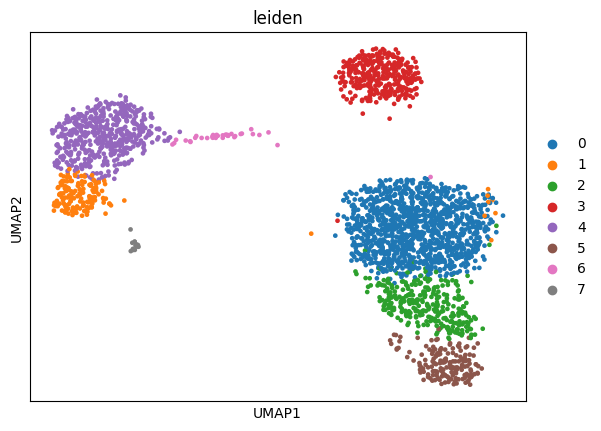

In [21]:
sc.pl.umap(pbmc, color='leiden')

To annotate the cells we simply use the `annotate_cluster` function. This will iterate through each cluster and try to determine the most likely cell types.

In [22]:
sl.tl.annotate_cluster(pbmc, 'leiden', llm, use_raw=True, top_genes=30, num_samples=20)

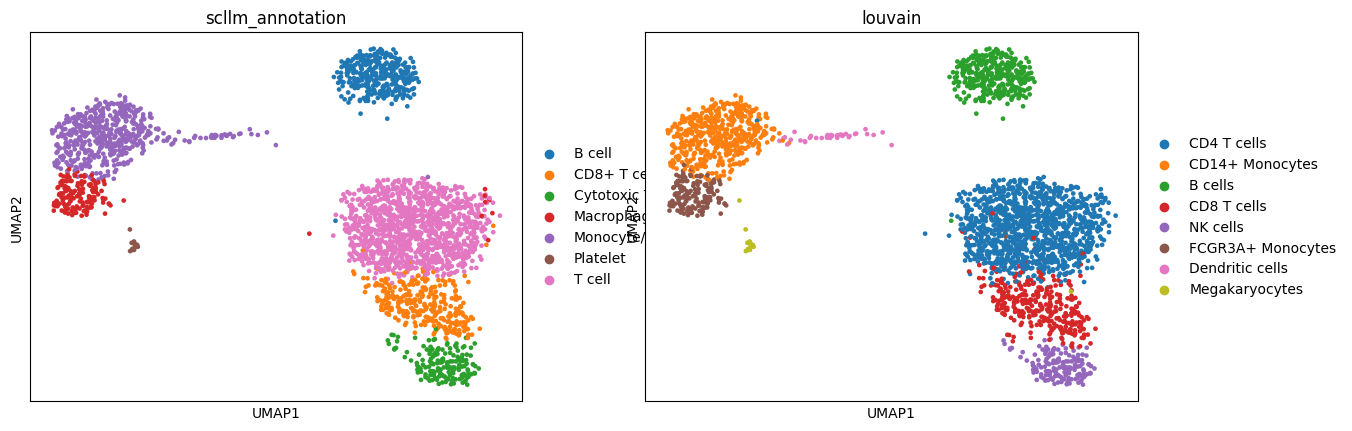

In [23]:
sc.pl.umap(pbmc, color=['scllm_annotation', 'louvain'])

## Angelidis

In [28]:
ang = sc.read_h5ad('/Users/harald/Downloads/umap_1.h5ad')

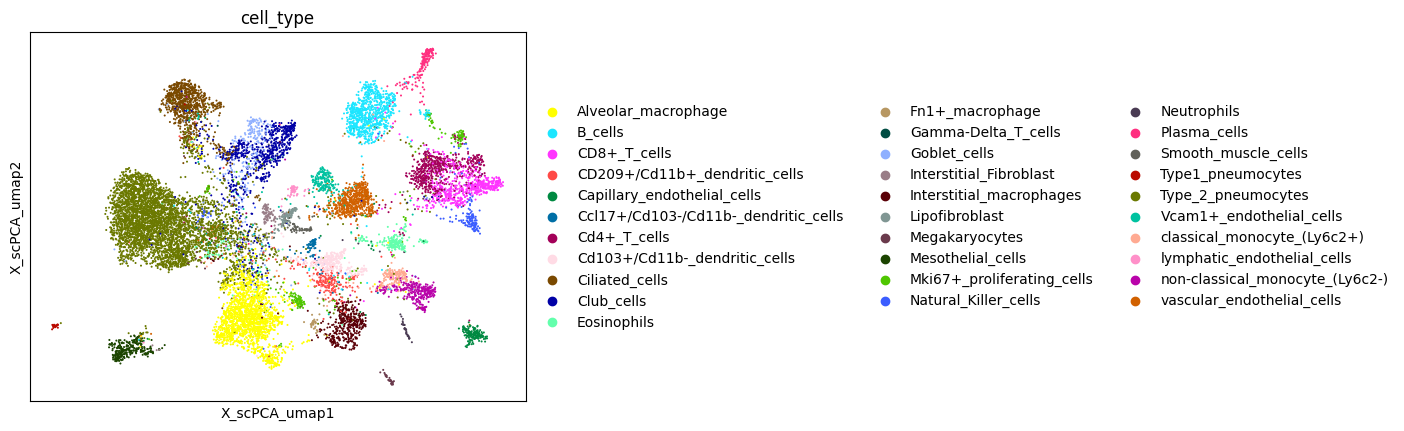

In [30]:
sc.pl.embedding(ang, 'X_scPCA_umap', color='cell_type')

In [33]:
sc.pp.neighbors(ang, use_rep='X_scPCA')

In [34]:
sc.tl.leiden(ang, flavor="igraph", n_iterations=2)

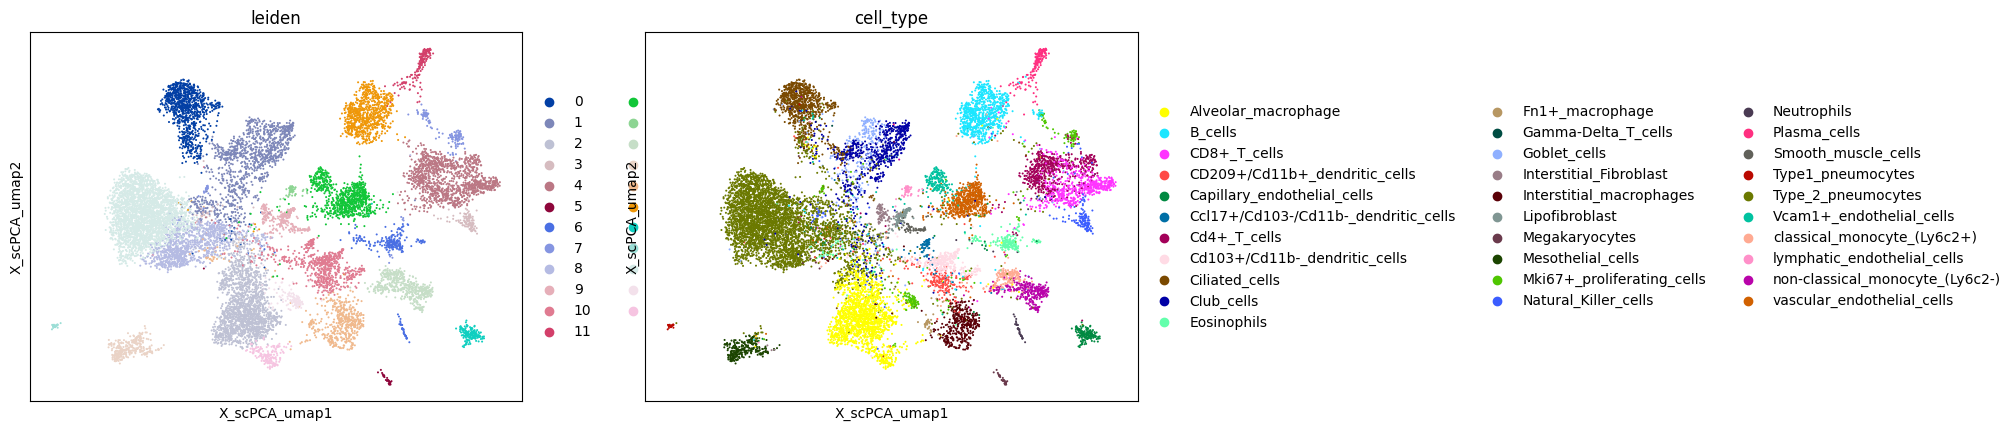

In [39]:
sc.pl.embedding(ang, basis='X_scPCA_umap', color=['leiden', 'cell_type'])

In [43]:
sl.tl.annotate_cluster(ang, 'leiden', llm, use_raw=False, top_genes=30, num_samples=20)

/Users/harald/Documents/opt/scllm/.venv/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/Users/harald/Documents/opt/scllm/.venv/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/Users/harald/Documents/opt/scllm/.venv/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.

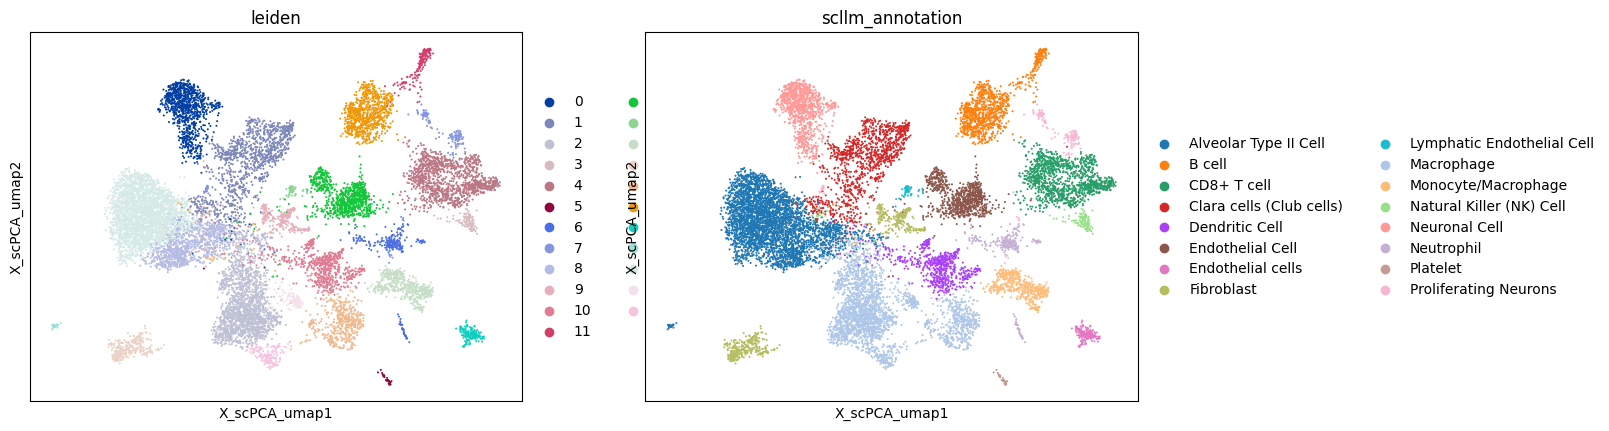

In [44]:
sc.pl.embedding(ang, basis='X_scPCA_umap', color=['leiden', 'scllm_annotation'])

In [46]:
?sc.tl.rank_genes_groups

Signature:
sc.tl.rank_genes_groups(
    adata: 'AnnData',
    groupby: 'str',
    *,
    mask_var: 'NDArray[np.bool_] | str | None' = None,
    use_raw: 'bool | None' = None,
    groups: "Literal['all'] | Iterable[str]" = 'all',
    reference: 'str' = 'rest',
    n_genes: 'int | None' = None,
    rankby_abs: 'bool' = False,
    pts: 'bool' = False,
    key_added: 'str | None' = None,
    copy: 'bool' = False,
    method: '_Method | None' = None,
    corr_method: '_CorrMethod' = 'benjamini-hochberg',
    tie_correct: 'bool' = False,
    layer: 'str | None' = None,
    **kwds,
) -> 'AnnData | None'
Docstring:
Rank genes for characterizing groups.

Expects logarithmized data.

Parameters
----------
adata : 'AnnData'
    Annotated data matrix.
groupby : 'str'
    The key of the observations grouping to consider.
mask_var : 'NDArray[np.bool_] | str | None', optional (default: None)
    Select subset of genes to use in statistical tests.
use_raw : 'bool | None', optional (default: None)
    